The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


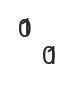

In [15]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import dataframe_image as dfi
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
f,a = plt.subplots(1,1,figsize=(1e-2, 1e-2))
mpl.rcParams['figure.dpi'] = 180
sns.set_style('darkgrid')
import os,sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

from tqdm.auto import tqdm
from datetime import datetime as dt
from src.utils import mkdirs, convert_path, pkl_dump, pkl_load, display_side, add_median_labels, get_palette
from src.data_processing import BL62_VALUES, BL62FREQ_VALUES, HLAS, AA_KEYS
from src.metrics import get_nested_feature_importance, plot_feature_importance
from src.models import Standardizer, NNAlign
from src.utils import pkl_load, pkl_dump, get_palette
from src.bootstrap import bootstrap_eval, get_pval, plot_pval
from src.bootstrap import get_pval, plot_pval
from src.datasets import NNAlignDataset, get_NNAlign_dataloader
import torch
from torch import nn
from torch.nn import functional as F
mpl.rcParams['figure.dpi'] = 180

In [3]:
cedar_aligned = pd.read_csv('../data/aligned_icore/230418_cedar_aligned.csv')
prime_aligned = pd.read_csv('../data/aligned_icore/230418_prime_aligned.csv')
viral = pd.read_csv('../data/other/viral.csv').rename(columns={'sequence':'Peptide'})
drb = pd.read_csv('../data/NetMHCIIpan_train/drb1_0301.csv')

# check dataset / extra features behaviour

In [11]:
from src.datasets import get_NNAlign_dataloader, NNAlignDataset
loader, dataset = get_NNAlign_dataloader(cedar_aligned, max_len=12, window_size=6, encoding='BL50LO', 
                                        seq_col='Peptide', target_col='agg_label', pad_scale=-15, return_dataset=True, 
                                        feature_cols = ['EL_rank_mut', 'icore_dissimilarity_score'])

In [21]:
from src.models import NNAlign
# Taking a sample and testing some stuff
xd, xd_mask, _, _ = dataset[50:100]
x_tensor, x_mask, x_features, y_true = dataset[:10]
mymodel = NNAlign(30, 6)
mymodel.fit_standardizer(xd, xd_mask)
z = mymodel(x_tensor, x_mask)

In [23]:
x_features.shape, z.shape

(torch.Size([10, 2]), torch.Size([10, 1]))

In [29]:
torch.cat([z, x_features], dim=1).shape

torch.Size([10, 3])